# Bayesian signal reconstruction with Gaussian Random Fields (Wiener Filtering)

Florent Leclercq,<br/>
Institut d'Astrophysique de Paris,<br/>
florent.leclercq@iap.fr

In [1]:
import numpy as np
import scipy.linalg
from matplotlib import pyplot as plt
import matplotlib.colors as mcolors
np.random.seed(123456)

In [2]:
plt.rcParams.update({'lines.linewidth': 2})
plt.rcParams.update({'text.usetex': True})
plt.rcParams.update({'text.latex.preamble': r"\usepackage{amsmath}\usepackage{upgreek}"})
plt.rcParams.update({'font.family': 'serif'})
plt.rcParams.update({'font.size': 15})
dir="./plots/Wiener_filter_denoising/"
!mkdir -p $dir

In [3]:
N=1000
epsilon=1e-10

## Setup signal covariance

In [4]:
t=np.array([100./(f*f) for f in range(1,N//2)])
signalcovar=np.concatenate([np.zeros(1),t,t[::-1],np.zeros(1)])
sqrtsignalcovar=np.diagflat(np.sqrt(signalcovar))
sqrtsignalcovarPix=np.fft.ifft(np.fft.fft(sqrtsignalcovar).T).T
sqrtsignalcovarPix=sqrtsignalcovarPix.real # get rid of the imaginary part, which is only numerical noise
signalcovarPix=sqrtsignalcovarPix@sqrtsignalcovarPix

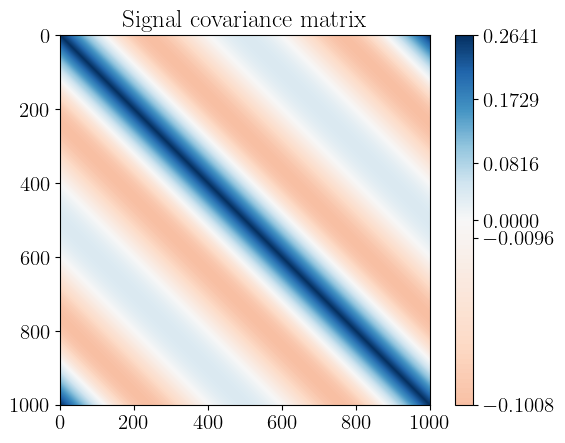

In [5]:
# Create a custom RdBu colormap with truncated red and centered around zero
cmap = plt.get_cmap('RdBu')
blue_part = cmap(np.linspace(0.35, 0.5, 128))
red_part = cmap(np.linspace(0.5, 1., 128))
custom_cmap = mcolors.LinearSegmentedColormap.from_list('custom RdBu', np.vstack((blue_part, red_part)))
norm = mcolors.TwoSlopeNorm(vcenter=0.)

# Plot with centered color bar
plt.xlim(0, N)
plt.ylim(N, 0)
plt.imshow(signalcovarPix, cmap=custom_cmap, norm=norm)
cbar = plt.colorbar()
# Specify colorbar ticks
ticks = np.linspace(signalcovarPix.min(), signalcovarPix.max(), 5)
ticks = np.append(ticks, 0)
cbar.set_ticks(ticks)
plt.title("Signal covariance matrix")
plt.savefig(dir+'signal_covariance_matrix.pdf', dpi=300, bbox_inches="tight", transparent=True)
plt.savefig(dir+'signal_covariance_matrix.png', dpi=300, bbox_inches="tight")
plt.show()

## Setup mask

In [6]:
mask=np.ones(N)
mask[400:800]=0.

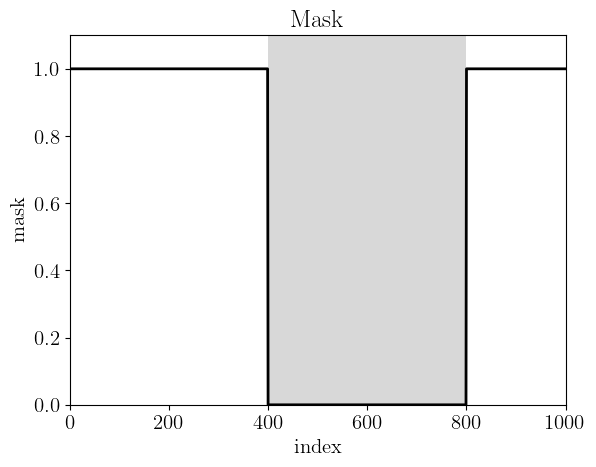

In [7]:
plt.xlim(0, N)
plt.ylim(0,1.1)
plt.xlabel("index")
plt.plot(np.arange(N),mask,color='black')
plt.fill_between([400,800],0.,1.1,facecolor='grey',alpha=0.3, linewidth=0.)
plt.ylabel("mask")
plt.title("Mask")
plt.savefig(dir+'mask.pdf',dpi=300,bbox_inches="tight",transparent=True)
plt.savefig(dir+'mask.png',dpi=300,bbox_inches="tight")
plt.show()

## Setup noise covariance

In [8]:
noisepower=0.00001
noisecovar=noisepower*np.concatenate([np.ones(N//2),10000*np.ones(N//2)])

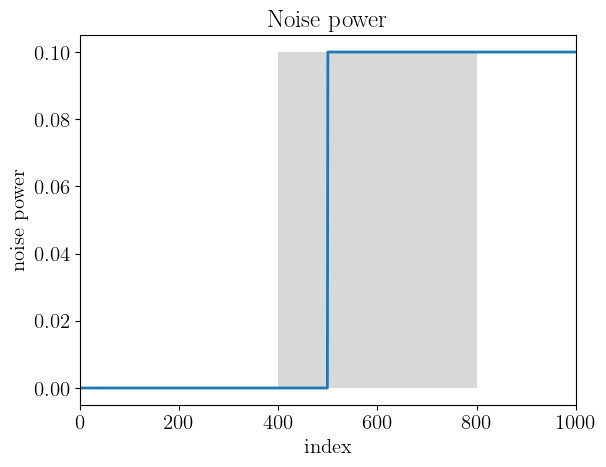

In [9]:
plt.xlim(0, N)
plt.xlabel("index")
plt.plot(np.arange(N),noisecovar)
plt.fill_between([400,800],0.,noisepower*10000,facecolor='grey',alpha=0.3, linewidth=0.)
plt.ylabel("noise power")
plt.title("Noise power")
plt.savefig(dir+'noise_power.pdf',dpi=300,bbox_inches="tight",transparent=True)
plt.savefig(dir+'noise_power.png',dpi=300,bbox_inches="tight")
plt.show()

In [10]:
invnoisecovarmat=np.diagflat(mask/noisecovar)

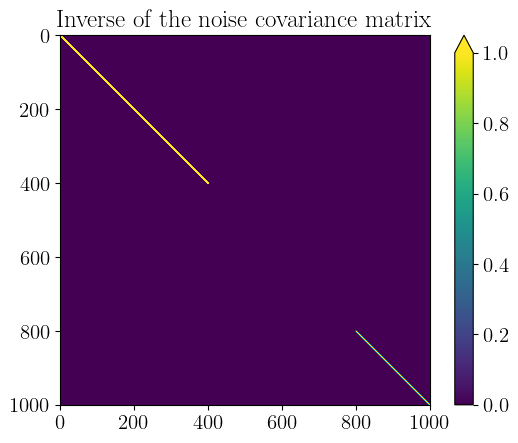

In [11]:
plt.xlim(0, N)
plt.ylim(N, 0)
plt.imshow(invnoisecovarmat, cmap='viridis', vmin=0, vmax=1)
plt.colorbar(extend='max')
plt.title("Inverse of the noise covariance matrix")
plt.savefig(dir+'inverse_noise_covariance_matrix.pdf', dpi=300, bbox_inches="tight", transparent=True)
plt.savefig(dir+'inverse_noise_covariance_matrix.png', dpi=300, bbox_inches="tight")
plt.show()

## Generate mock data

Data model: $d=s+n$

In [12]:
# The truth
normalsim=np.random.normal(0.,1.,N)
s=sqrtsignalcovarPix.real.dot(normalsim)

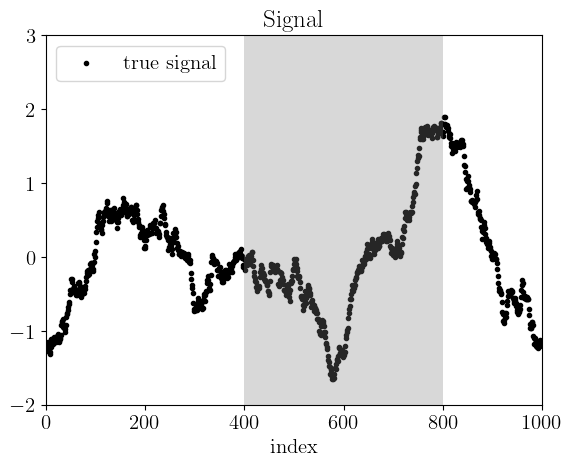

In [13]:
plt.xlim(0,N)
plt.xlabel("index")
plt.ylim(-2,3)
plt.scatter(np.arange(N),s,marker='.',color='black',label="true signal")
plt.fill_between([400,800],-2,3,facecolor='grey',alpha=0.3, linewidth=0.)
plt.title("Signal")
plt.legend(loc="upper left")
plt.savefig(dir+'signal.pdf', dpi=300, bbox_inches="tight", transparent=True)
plt.savefig(dir+'signal.png', dpi=300, bbox_inches="tight")
plt.show()

In [14]:
# The noise, with infinite variance in masked regions
normalsim=np.random.normal(0.,1.,N)
n=normalsim/np.sqrt(np.diag(invnoisecovarmat)+epsilon)
d=s+n

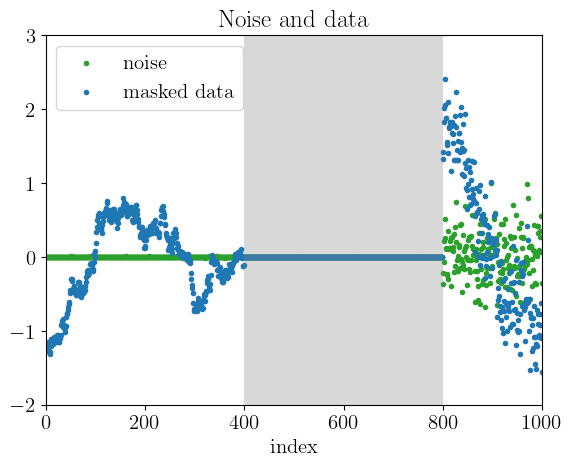

In [15]:
plt.xlim(0,N)
plt.xlabel("index")
plt.ylim(-2,3)
plt.scatter(np.arange(N),mask*n,marker='.',color='C2',label="noise")
plt.scatter(np.arange(N),mask*d,marker='.',color='C0',label="masked data")
plt.fill_between([400,800],-2,3,facecolor='grey',alpha=0.3, linewidth=0.)
plt.title("Noise and data")
plt.legend(loc="upper left")
plt.savefig(dir+'noise_and_data.pdf', dpi=300, bbox_inches="tight", transparent=True)
plt.savefig(dir+'noise_and_data.png', dpi=300, bbox_inches="tight")
plt.show()

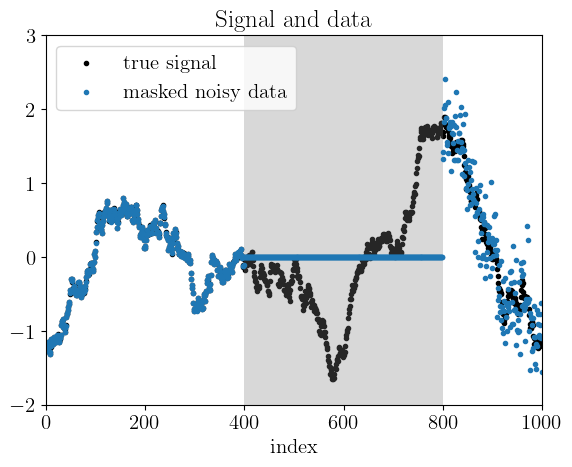

In [16]:
plt.xlim(0,N)
plt.xlabel("index")
plt.ylim(-2,3)
plt.scatter(np.arange(N),s,marker='.',color='black',label="true signal")
plt.fill_between([400,800],-2,3,facecolor='grey',alpha=0.3, linewidth=0.)
plt.scatter(np.arange(N),mask*d,marker='.',color='C0',label="masked noisy data")
plt.title("Signal and data")
plt.legend(loc="upper left")
plt.savefig(dir+'signal_and_data.pdf', dpi=300, bbox_inches="tight", transparent=True)
plt.savefig(dir+'signal_and_data.png', dpi=300, bbox_inches="tight")
plt.show()

## Setup Wiener Filter

Covariance of the Wiener Filter:
\begin{equation}
\mathrm{Cov}_\mathrm{WF} = (N^{-1}+S^{-1})^{-1} = S^{1/2}(I+S^{1/2}N^{-1}S^{1/2})^{-1}S^{1/2}
\end{equation}

In [17]:
M=np.identity(N)+sqrtsignalcovarPix.dot(invnoisecovarmat).dot(sqrtsignalcovarPix)
CovWF=sqrtsignalcovarPix.dot(np.linalg.inv(M)).dot(sqrtsignalcovarPix)
CovWF=(CovWF+CovWF.T)/2 # for numerical stability reasons
CovWF=CovWF.real # get rid of the imaginary part, which is only numerical noise
sqrtCovWF=scipy.linalg.sqrtm(CovWF)

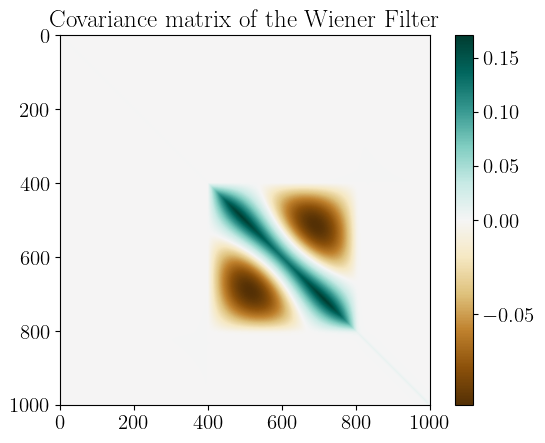

In [18]:
norm = mcolors.TwoSlopeNorm(vcenter=0.)

plt.xlim(0, N)
plt.ylim(N, 0)
plt.imshow(CovWF, cmap='BrBG', norm=norm)
plt.colorbar()
plt.title("Covariance matrix of the Wiener Filter")
plt.savefig(dir+'covariance_matrix_wiener_filter.pdf', dpi=300, bbox_inches="tight", transparent=True)
plt.savefig(dir+'covariance_matrix_wiener_filter.png', dpi=300, bbox_inches="tight")
plt.show()

## Perform signal reconstruction (apply Wiener Filtering)

Mean of the Wiener posterior:
\begin{equation}
s_\mathrm{WF} = \mathrm{Cov}_\mathrm{WF} N^{-1} d
\end{equation}

In [19]:
sWF=CovWF.dot(invnoisecovarmat).dot(d).real

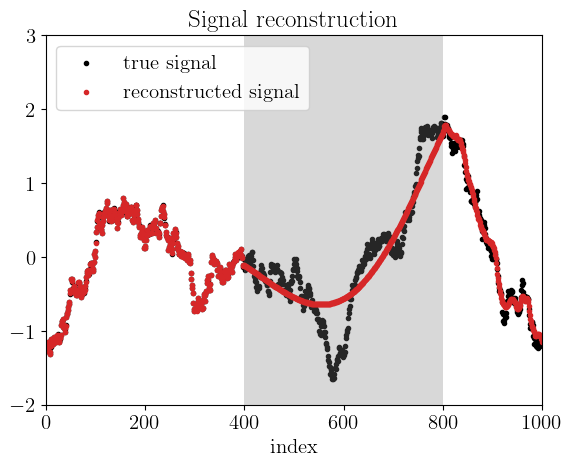

In [20]:
plt.xlim(0,N)
plt.xlabel("index")
plt.ylim(-2,3)
plt.scatter(np.arange(N),s,marker='.',color='black',label="true signal")
plt.fill_between([400,800],-2,3,facecolor='grey',alpha=0.3, linewidth=0.)
plt.scatter(np.arange(N),sWF,marker='.',color='C3',label="reconstructed signal")
plt.title("Signal reconstruction")
plt.legend(loc="upper left")
plt.savefig(dir+'signal_reconstruction.pdf', dpi=300, bbox_inches="tight", transparent=True)
plt.savefig(dir+'signal_reconstruction.png', dpi=300, bbox_inches="tight")
plt.show()

## Generate constrained realizations (draw samples from the Wiener posterior)

Samples of the Wiener posterior:
\begin{equation}
s=s_\mathrm{WF}+\sqrt{C_\mathrm{WF}} \, G(0,1)
\end{equation}
so that $\left\langle s \right\rangle = s_\mathrm{WF}$ and $\mathrm{Cov}(s) = C_\mathrm{WF}$

In [21]:
cr1=sqrtCovWF.dot(np.random.normal(0.,1.,N)).real+sWF
cr2=sqrtCovWF.dot(np.random.normal(0.,1.,N)).real+sWF
cr3=sqrtCovWF.dot(np.random.normal(0.,1.,N)).real+sWF

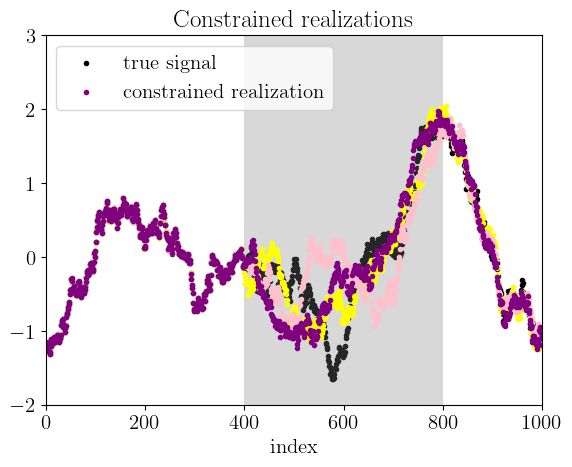

In [22]:
plt.xlim(0,N)
plt.xlabel("index")
plt.ylim(-2,3)
plt.scatter(np.arange(N),s,marker='.',color='black',label="true signal")
plt.fill_between([400,800],-2,3,facecolor='grey',alpha=0.3, linewidth=0.)
plt.scatter(np.arange(N),cr1,marker='.',color='yellow')
plt.scatter(np.arange(N),cr2,marker='.',color='pink')
plt.scatter(np.arange(N),cr3,marker='.',color='purple',label="constrained realization")
plt.title("Constrained realizations")
plt.legend(loc="upper left")
plt.savefig(dir+'constrained_realizations.pdf', dpi=300, bbox_inches="tight", transparent=True)
plt.savefig(dir+'constrained_realizations.png', dpi=300, bbox_inches="tight")
plt.show()

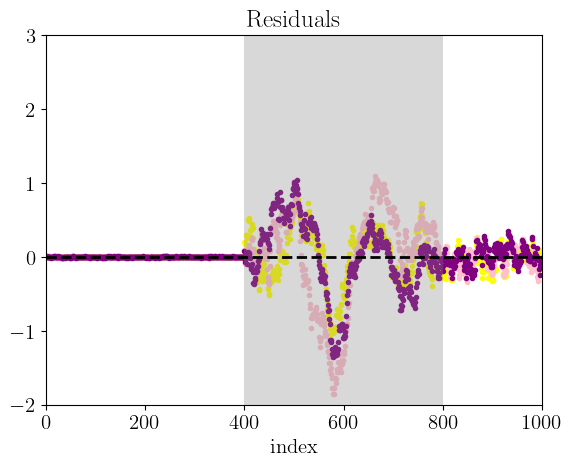

In [23]:
plt.xlim(0,N)
plt.xlabel("index")
plt.ylim(-2,3)
plt.scatter(np.arange(N),s-cr1,marker='.',color='yellow')
plt.scatter(np.arange(N),s-cr2,marker='.',color='pink')
plt.scatter(np.arange(N),s-cr3,marker='.',color='purple')
plt.plot([0,N],[0,0],color='black',linestyle='--',linewidth=2)
plt.fill_between([400,800],-2,3,facecolor='grey',alpha=0.3, linewidth=0.)
plt.title("Residuals")
plt.savefig(dir+'residuals.pdf', dpi=300, bbox_inches="tight", transparent=True)
plt.savefig(dir+'residuals.png', dpi=300, bbox_inches="tight")
plt.show()